<img src="https://upload.wikimedia.org/wikipedia/commons/6/63/ETH_Z%C3%BCrich_wordmark.svg" width="200" height="200" align="left">
<br />
<div align="right"> <b/> FS 2022
<br />
    
## <div align="center"> Project & Seminars: Python for Science & Machine Learning
---

# <div align="center"> 6th week: Curve-fitting using SciPy & Fast Fourier Transforms of audio files

## Introduction
In this exercise sheet there are two separate exercises. One is fitting a function to Covid data from Switzerland, and the other is doing a FFT analysis of audio files where you will decompose sound into it's frequencies.

# Exercise 1: Using SciPy to fit Covid data

## Covid statistics: is spread an exponential?

In this exercise you will work with fitting some real covid data from the first wave in Switzerland two years ago to a very simple function that turns out to have pretty strong predictive power.

This data is publically avaible on the internet, and we use a library called `pandas` to open and modify it. `pandas` is a great tool to use when dealing with more complex datasets but you do not have to worry about how to use it here, it is done for you.

**Note:** If you are missing some of the packages imported below, remember that you can download them using ``pip install PACKAGE_NAME`` in the **workstation's terminal**. Sometimes the PACKAGE_NAME is slightly different, if so please ask your friend Google ;).

### Opening the data using pandas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import data 
data = pd.read_excel('covidData.xlsx')
# Keep only the data of Switzerland
swiss_data = data.iloc[np.where(data['countriesAndTerritories'] == 'Switzerland')]
# Sort the data chronologically
swiss_data = swiss_data.sort_values(by='dateRep')
swiss_data

ImportError: DLL load failed while importing _cext: Das angegebene Modul wurde nicht gefunden.

Plot all daily cases from the start of the pandemic to now, just to get an overview.

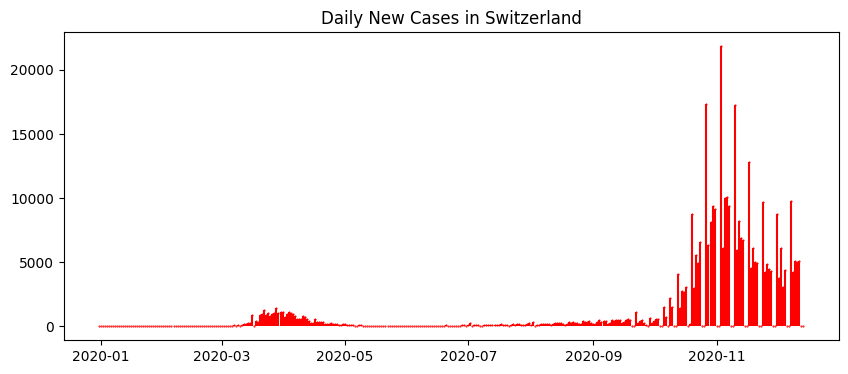

In [4]:
# get dates and cases from the pandas dataframe
dates = swiss_data['dateRep']
cases = swiss_data['cases']

# plot
plt.figure(figsize=(10, 4))
plt.title('Daily New Cases in Switzerland')
plt.plot(dates, cases, marker='o', color='r', markersize=0.5, linestyle='None')
plt.vlines(dates, 0, cases, color='r', label='Covid cases')
plt.show()

In this exercise we are interested in the **cumulative sum** of cases, that is, the total number of infections at a given point in time. This is achieved by a running sum of the daily new cases.

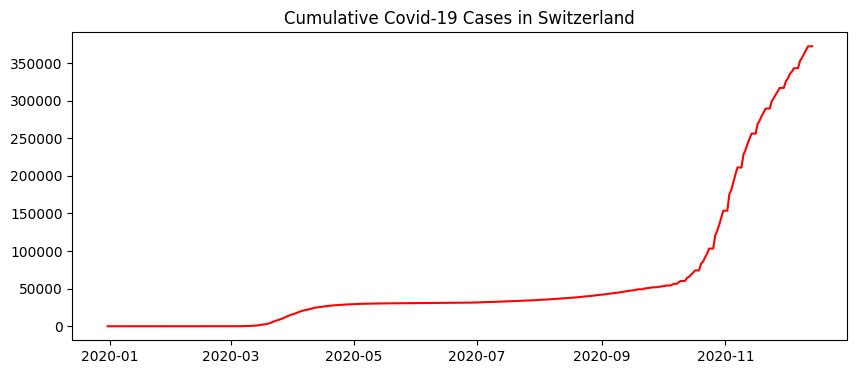

In [5]:
# Calculate cumulative sum of cases
cumulative_cases = np.cumsum(cases)

plt.figure(figsize=(10, 4))
plt.title('Cumulative Covid-19 Cases in Switzerland')
plt.plot(dates, cumulative_cases, color='r')
plt.show()

Pick out only the first wave.

In [7]:
# Get data from first wave, between 1st of February 2020 and 31st of May 2020
first_wave = swiss_data.loc[(1 < swiss_data['month']) & (swiss_data['month'] < 6)]
first_dates = np.array(first_wave['dateRep'])
first_cases = np.cumsum(np.array(first_wave['cases'])) # make cumulative sum

## Exponential?
At the early stage of an outbreak, the viral spread is exponential since the rate of infection is proportional to the number of infected people. This is reasonable since the rate of infection should be larger the more sick people there are. This is given by a differential equation:

$$ \frac{dN}{dt} = aN(t) $$

The solution to this is an exponential $N(t) = Ae^{at}$. Does the real covid data from last year agree with this simplified model?

### Exercise 1.1: Looking at shape of first wave 
You now have two arrays, `first_dates` and `first_cases`. Make two new arrays with only the dates and cases from February 1st (beginning) to March 15th 2020 (doesn't have to be exact, but somewhere around the middle of March to get the early stage of the outbreak).

Plot the two new arrays, calculate the logarithm of the cases using `np.log()` and plot it too. 

What is the shape of the cases? If it is exponential, what should the shape of the logarithm of the spread be?

In [8]:
# enter your code here

new_dates = 

NameError: name 'first' is not defined

Now plot the whole first wave. Does the data still look exponential? What is the shape of the logarithm of the data? **Explain why the shape is no longer exponential.**

In [ ]:
# enter your code here

## How to correct for non-exponential development
To account for the effects that cause the data to no longer be exponential (no spoilers what it is!), we use a logistic function (a type of sigmoid):

$$N_{logistic}(t) = \frac{A}{1 + e^{-k(t - t_0)}}$$

Where A is a normalization, k the rate of change, and t0 the value of the infliction point (where the function reaches half its maximum in this case).

### Bonus note: 
The logistic function is given from a differential equation of the form

$$ \frac{dN(t)}{dt} = \frac{k}{a}N(t)(a - N(t)) $$

Is this compatible with your reasoning why the spread is not exponential after some time?

### Exercise 1.2: Fitting the first wave to a logistic function

Write a function of the form `def sigmoid(t,A,k,t0):` that returns the value of the logistic function.

Then, use SciPy fitting to get best fit values for the parameters A, k and t0 to the real covid data. The scipy function `curve_fit` uses least-squares method to fit a function to a set of data, similar to the fitting code you wrote in a previous exercise. `curve_fit` will return `popt` (parameter optimal) which are the best values of your fit parameters (A, k and t0) and `pcov` (parameter covariance) which gives correlation between the parameters. You can ignore the covariance in this exercise.

After getting your optimal fit parameters, plot a logistic function with the best fit parameters on top of the real covid data. Isn't it incredible how such a simple function predicts virus spread so accurately?

In [ ]:
from scipy.optimize import curve_fit

def sigmoid(t,A,k,t0):
    # enter your code here

# get an array of day number instead of dates (for computation can't use dates)
day_array = np.arange(0, len(first_cases))
# fit the data
popt, pcov = curve_fit(sigmoid, day_array, first_cases)
print("Best fit of [A,k,t0] = ",popt)

A_best = popt[0]
k_best = popt[1]
t0_best = popt[2]

# plot the results of your fit on top of the real covid data
# enter your code here

In the logistic function, the parameter k is related to the probability of viral transmission between people. If we lower it (for example using masks and social distancing), then the spread slows down, but ultimately reaches the same total number of infections. This is what's referred to as *flattening the curve* in media. The total number of cases are the same, but the health care system is less strained due to lower volume of infections per day.

# Exercise 2: Using numpy to analyze audio data - Fast Fourier Transform

In this part of the exercise you will use numpy to study the properties of two audio files:

+ "guitarC.wav": Audio of a classical guitar playing the C4 note (262Hz).

+ "pianoC.wav": Audio of a piano playing the C4 note (262Hz).

You will visualize the differences of both audios, and modify them to try and obtain exactly the same sound. 

To do so you will use numpy's ``numpy.fft.rfft`` function to compute the Fast Fourier Transform of a real-valued array.

**Note:** If you are missing some of the packages imported below, remember that you can download them using ``pip install PACKAGE_NAME`` in the workstation's terminal. Sometimes the PACKAGE_NAME is slightly different, if so please ask your friend Google ;).

In [ ]:
# Import necessary packages

import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
from IPython.display import Audio,display
from scipy.io.wavfile import write

You will use the function written below to play the audios in Jupyter Notebook.

In [ ]:
# Listen to original audio file

print('C4 note (262Hz) played on a classical guitar:')
display(Audio("guitarC.wav"))

print('C4 note (262Hz) played on a piano:')
display(Audio("pianoC.wav"))


**Exercise 2.2:** Read the following code and fill the blanks:
>1. Using the already given data (frame rate, number of frames), create two numpy arrays called _guitarTime_ and _pianoTime_ that will contain the time (in milliseconds) that corresponds to each value of the _guitarSignal_ and _pianoSignal_ arrays.  
    + **Hint:** Use the function ``np.linspace``. Both time and signal arrays should have the same length. 

>2. Using the function ``plt.subplots``, create a plot containing one subplot for each signal with the following characteristics:
>    + Contains 2 rows and 1 column.
>    + Has a width of 12 inches and a height of 6 inches (inches is already the default in matplotlib).
>    + The first subplot contains the function _guitarSignal_ vs _guitarTime_ and is named "Guitar Signal Wave".
>    + The second subplot contains the function _pianoSignal_ vs _pianoTime_ and is named "Piano Signal Wave".
>    + Name the x axis: "t (ms)" (for both subplots).
>    + Name the y axis: "Amplitude" (for both subplots).
>    + Plot only the following range of time values: [100, 110] ms (for both subplots).
>    + Use ``plt.tight_layout()`` to automatically adjust the padding around and between subplots.
>

**Documentation:** ``plt.subplots``: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

In [ ]:
# Open audio files
guitar = wave.open("guitarC.wav", "r")
piano = wave.open("pianoC.wav", "r")

# Extract Raw Audio from Wav Files 
guitarSignal = np.frombuffer(guitar.readframes(-1), dtype="int32")  # data
guitarRate = guitar.getframerate()  # framerate
guitarFrames = guitar.getnframes()  # nº frames
guitarTime = ### 1: INSERT YOUR CODE HERE

pianoSignal = np.frombuffer(piano.readframes(-1), dtype="int16")  # data
pianoRate = piano.getframerate()  # framerate
pianoFrames = piano.getnframes()  # nº frames
pianoTime = ### 1: INSERT YOUR CODE HERE

# Plot audio signals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
### 2: INSERT YOUR CODE HERE
ax1.minorticks_on()  # activate minorticks for the first subplot
ax1.grid(which='minor')  # add a grid with subdivisions to the first subplot
ax2.minorticks_on()  # activate minorticks for the second subplot
ax2.grid(which='minor')  # add a grid with subdivisions to the second subplot
plt.show()

**Exercise 2.3:** Take a look at the shape of both signals (ignore the amplitude). Are they periodic? If yes, what is their period? And their frequency? Does it make sense?

**Write the answer here:**

**Exercise 2.4:** Calculate the Fast Fourier Transform of both signals using ``np.fft.rfft``. Calculate also the frequency that corresponds to each value of the Fast Fourier Transform using ``np.fft.rfftfreq``.

**Documentation:**
+ ``np.fft.rfft``: https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html  
+ ``np.fft.rfftfreq``: https://numpy.org/doc/stable/reference/generated/numpy.fft.rfftfreq.html

In [ ]:
# Fast Fourier Transform
guitarFFT = ### INSERT YOUR CODE HERE
guitarFreq = ### INSERT YOUR CODE HERE
pianoFFT = ### INSERT YOUR CODE HERE
pianoFreq = ### INSERT YOUR CODE HERE

**Exercise 2.5:** Plot (using the same function as before) a figure with 4 subplots (2 rows and 2 columns):
+ The first row should contain two plots of the function _guitarFFT_ vs _guitarFreq_. The first with data from 0 to 5000 Hz and the second from 0 to 1000 Hz.
+ Do the same for _pianoFFT_ vs _pianoFreq_ for the second row.
+ Add titles to the subplots and axis, and use ``plt.tight_layout()`` for better visualization.

In [ ]:
# Plot audio signals
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))
### INSERT YOUR CODE HERE
plt.show()

**Exercise 2.6:** What can you see? What is the dominating frequency? How could we differentiate the two instruments only looking at the spectrum?

**Write your answer here:**

Now you will modify the Fourier Transform of both signals to try and obtain exactly the same sound in both audios.

To do so, you will set to 0 all the values of _guitarFFT_ and _pianoFFT_ that are NOT in its main frequency (262 Hz). Given that the frequency values are floats, there may be a possibility that there is not a single value with a exact frequency of 262 Hz. To avoid this, you will convert the frequency arrays' type into integers first.

**Exercise 2.7:** Convert the type of the arrays _guitarFreq_ and _pianoFreq_ into integers. Then use them to set to 0 all the values of _guitarFFT_ and _pianoFFT_ that are not in the appropriate frequency. Afterwards apply the inverse FFT using ``np.fft.irfft``. Finally, plot the two filtered signals **using the same characteristics** as in Exercise 2.2 (you can copy the code from there and make the necessary changes).

+ **Hint:** You may want to take a look at Boolean array indexing: https://numpy.org/devdocs/reference/arrays.indexing.html#boolean-array-indexing

**Documentation:** ``np.fft.irfft``: https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft.html

In [ ]:
### INSERT YOUR CODE HERE
guitarFiltSignal = np.fft.irfft(guitarFFT)  # apply inverse Fast Fourier Transform of guitarFFT
pianoFiltSignal = np.fft.irfft(pianoFFT)  # apply inverse Fast Fourier Transform of pianoFFT

# Plot audio signals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
### INSERT YOUR CODE HERE
plt.show()

**Exercise 2.8:** What can you see? Why did this happen? (ignore the phase)

**Write your answer here:**

Now, to finish, we will save this signals as audio files (.wav) to listen to them using the function _wavPlayer_ defined at the beginning of this exercise. To do so, we will use the function _write_. This function takes as inputs normalized arrays (with range [-1.0, 1.0]) of type float32.

**Exercise 2.9:** Convert the signals that your filtered in last exercise into type float32 and normalize them. Use the code given to save them as .wav files. Afterwards, run the code in the next cell to play the two audios.

In [ ]:
# Save file
guitarNormalized = ### INSERT YOUR CODE HERE
write('guitarFilt.wav', guitarRate, guitarNormalized)  
pianoNormalized = ### INSERT YOUR CODE HERE
write('pianoFilt.wav', pianoRate, pianoNormalized)  

In [ ]:
display(Audio(('guitarFilt.wav')))
display(Audio(('pianoFilt.wav')))

### Optional exercise:

As you may have seen, the results are not as expected, given that the two sounds are not **exactly** the same. If you have a good ear, you will hear how we have a modulation of intensity. Additionally, the phase of the signals plotted in Exercise 2.7 are slightly different. 

**Exercise 2.10:** Why is this happening?

+ **Hints:** Try plotting the filtered signals in its whole range. Have a look at the FFT of the filtered signals...

**Write your answer here:**

In [ ]:
### INSERT YOUR CODE HERE